Instructions
Objective:
To segment customers into groups for a targeted marketing strategy.

Data:
Dataset obtained from Credit Card Dataset for Clustering | Kaggle. Original source unknown. The dataset file is attached below for download. 

Problem Statement:
The marketing department for a credit card company wants to learn more about the different kinds of customers they have in order to develop a marketing strategy that targets each group separately. As a data scientist, your job is to find the best way to divide the customers into groups, and to develop a description of each group to be used by the marketing strategists.

Steps to Completion:
Create a Jupyter notebook and complete the following steps. 


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

1. Data

A. Load CC General.csv into a pandas DataFrame and print the header. Use pandas.DataFrame.describe to summarize the data. In a Markdown cell, explain the meaning of each column, make observations based on these statistics, and discuss whether they provide useful insights

In [ ]:
url = "https://raw.githubusercontent.com/Hunteracademic/Unsupervised_assignment_1/master/CCGENERAL.csv"
credit_data = pd.read_csv(url)
credit_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Column Descriptions

### Credit Card Dataset: Column Guide
These definitions are based on the standard CC GENERAL data used for customer segmentation and behavior analysis (Bhasin, 2017). 

### The Basics
- CUST_ID: Just a unique ID for each cardholder. It’s categorical, so don't try to run any math on it.

- BALANCE: The average amount the customer carries on their card month-to-month.

- BALANCE_FREQUENCY: A score from 0 to 1 showing how often the balance actually changes. A "1" means their balance updates every single month; lower scores mean the account is relatively inactive.

- TENURE: How long they’ve been a customer (usually ranges from 6 to 12 months in this specific set).

### Spending Habits 
- PURCHASES: Total spend over the last year.

- ONEOFF_PURCHASES: Total amount spent on "lump sum" or single transactions (no installments).

- INSTALLMENTS_PURCHASES: Total spend specifically handled through monthly payment plans.

- CASH_ADVANCE: Total cash the customer withdrew from the card (essentially a short-term loan).

### Activity & Frequency
<!-- All "Frequency" columns are scaled from 0 to 1. Think of 1 as "happening constantly" and 0 as "never happened." -->

- PURCHASES_FREQUENCY: How often they use the card for any purchase.

- ONEOFF_PURCHASES_FREQUENCY: How often they make those big, single purchases.

- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently they opt for installment-based payments.

- CASH_ADVANCE_FREQUENCY: How often they take out cash advances.

- PURCHASES_TRX: The raw count of total purchase transactions.

- CASH_ADVANCE_TRX: The raw count of total cash advance transactions.

### Credit & Repayment
- CREDIT_LIMIT: The maximum spending limit set by the bank.

- PAYMENTS: Total amount the customer paid back over the last 12 months.

- MINIMUM_PAYMENTS: The portion of their payments that went toward the "minimum due" amount.

- PRC_FULL_PAYMENT: The percentage of months where the customer paid off their entire balance rather than just the minimum. This is a great indicator of financial health

In [ ]:
credit_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000



B. Use pandas.DataFrame.info to check if the entries are the correct data types and if there are any missing values. Use pandas.DataFrame.duplicates to check for duplicate entries. Clean the dataset so there are no missing values, duplicate rows, or incorrect data types. Document the changes and cleaning process in Markdown.


In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

### Duplicate
There are no duplicate values

In [ ]:
print(credit_data.duplicated().sum())

0


### Null
There is one missing value in credit limit and 313 missing values in minimum payments. We will drop the missing values rows. 

In [ ]:
print(credit_data.isna().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [ ]:
credit_data = credit_data.dropna()

In [ ]:
print(credit_data.isna().sum())


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64



C. Drop the 'CUST_ID' column. Use seaborn.heatmap to display the correlation matrix of the features. Use seaborn.pairplot to generate scatter plots and histograms. Record your observations and discuss the insights gained in Markdown. 


In [ ]:
No_cust_id = credit_data.drop("CUST_ID", axis=1)
Cust_id = credit_data["CUST_ID"]
No_cust_id.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


### Dropping unneeded columns:

- PURCHASES: We are dropping this column because it's a combination of both the ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES. This makes purchases hard to interpret without spending more resources interpreting and or splitting purchases to figure out the ONEOFF and INSTALLKMENT purchase ratios 

- PURCHASES_FREQUENCY: The same reason as Purchases.

In [ ]:
clean_cust_id = No_cust_id.drop(["PURCHASES", "PURCHASES_FREQUENCY"], axis=1)
clean_cust_id.head()

# Heatmap and Pairplot
### Heatmap 

### Pairplot


Text(0.5, 1, 'Correlation Heatmap of Credit Data')

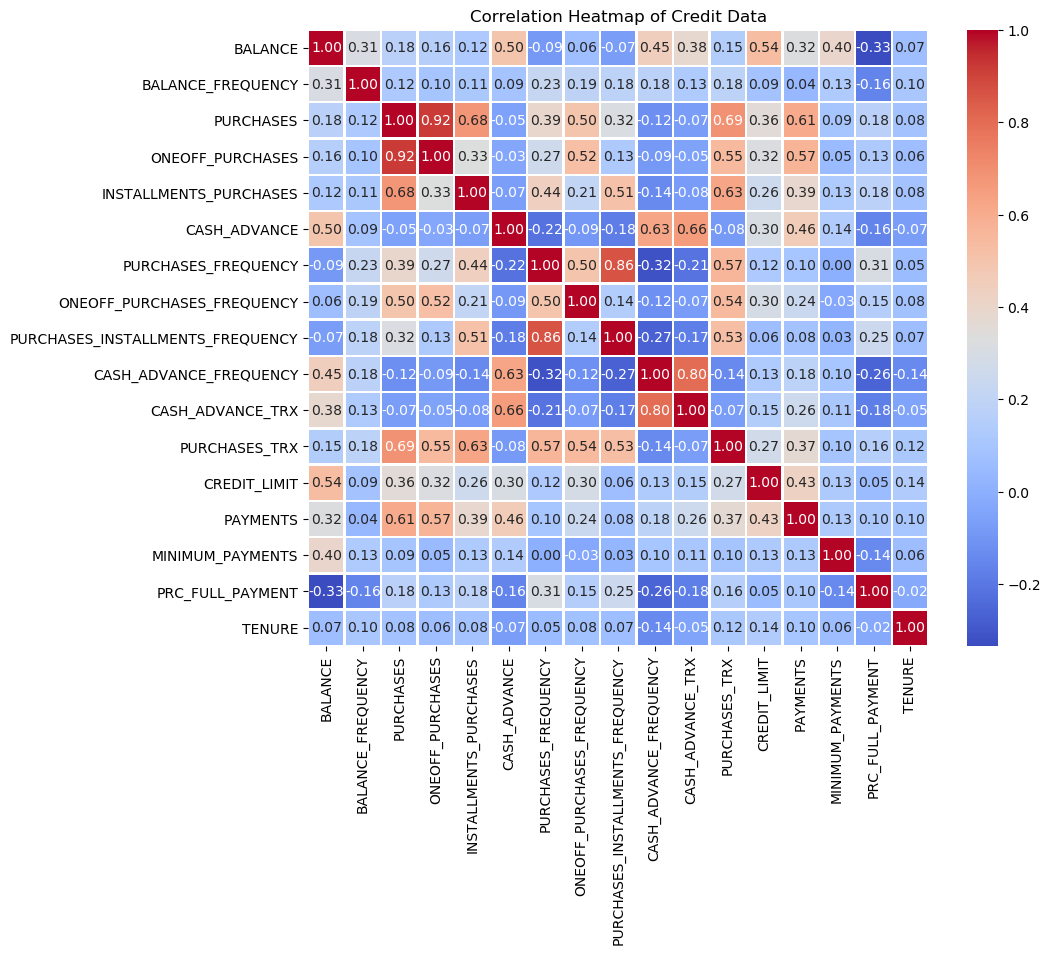

In [ ]:
corr = clean_cust_id.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=1
)
plt.title("Correlation Heatmap of Credit Data")

In [ ]:
# sns.pairplot(No_cust_id)

2. Modeling
A. Use sklearn.preprocessing.MinMaxScaler to scale the data and print the transformed header. 

In [ ]:
scaler = MinMaxScaler()
# Fit dataset into new variable using scaler
scaled_x = scaler.fit_transform(No_cust_id)
# create dataframe with index and column names
df_scaled = pd.DataFrame(scaled_x, columns=clean_cust_id.columns, index=clean_cust_id.index)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0
5,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0


B. Use sklearn.cluster.AgglomerativeClustering to cluster the data. Create at least 10 different models using various hyperparameter combinations (n_clusters, metric, linkage, distance_threshold). Calculate the silhouette score for each model and tabulate the results. 

In [ ]:
ac_avg_type = [
    AgglomerativeClustering(n_clusters = k, affinity="euclidean", linkage="average") 
    for k in range(2, 12)
    ]

ac_complete_type = [
    AgglomerativeClustering(n_clusters = k, affinity="euclidean", linkage="complete") 
    for k in range(2, 12)
    ]

ac_single_type = [
    AgglomerativeClustering(n_clusters = k, affinity="euclidean", linkage="single") 
    for k in range(2, 12)
    ]

ac_ward_type = [
    AgglomerativeClustering(n_clusters = k, affinity="euclidean", linkage="ward") 
    for k in range(2, 12)
    ]

In [ ]:
results_1 = []
results_2 = []
results_3 = []
results_4 = []

for model in ac_avg_type:
    labels = model.fit_predict(scaled_x)
    score = silhouette_score(scaled_x, labels)
    results_1.append({
        "n_clusters": model.n_clusters,
        "linkage": model.linkage,
        "silhouette": score
    })
    print(f"n_clusters={model.n_clusters}, linkage={model.linkage}, silhouette={score:.3f}")

print("\n")

for model in ac_ward_type:
    labels = model.fit_predict(scaled_x)
    score = silhouette_score(scaled_x, labels)
    results_2.append({
        "n_clusters": model.n_clusters,
        "linkage": model.linkage,
        "silhouette": score
    })
    print(f"n_clusters={model.n_clusters}, linkage={model.linkage}, silhouette={score:.3f}")

print("\n")

for model in ac_complete_type:
    labels = model.fit_predict(scaled_x)
    score = silhouette_score(scaled_x, labels)
    results_3.append({
        "n_clusters": model.n_clusters,
        "linkage": model.linkage,
        "silhouette": score
    })
    print(f"n_clusters={model.n_clusters}, linkage={model.linkage}, silhouette={score:.3f}")

print("\n")

for model in ac_single_type:
    labels = model.fit_predict(scaled_x)
    score = silhouette_score(scaled_x, labels)
    results_4.append({
        "n_clusters": model.n_clusters,
        "linkage": model.linkage,
        "silhouette": score
    })
    print(f"n_clusters={model.n_clusters}, linkage={model.linkage}, silhouette={score:.3f}")

n_clusters=2, linkage=average, silhouette=0.470
n_clusters=3, linkage=average, silhouette=0.384
n_clusters=4, linkage=average, silhouette=0.317
n_clusters=5, linkage=average, silhouette=0.257
n_clusters=6, linkage=average, silhouette=0.209
n_clusters=7, linkage=average, silhouette=0.190
n_clusters=8, linkage=average, silhouette=0.182
n_clusters=9, linkage=average, silhouette=0.325
n_clusters=10, linkage=average, silhouette=0.325
n_clusters=11, linkage=average, silhouette=0.312


n_clusters=2, linkage=ward, silhouette=0.366
n_clusters=3, linkage=ward, silhouette=0.332
n_clusters=4, linkage=ward, silhouette=0.262
n_clusters=5, linkage=ward, silhouette=0.256
n_clusters=6, linkage=ward, silhouette=0.256
n_clusters=7, linkage=ward, silhouette=0.273
n_clusters=8, linkage=ward, silhouette=0.276
n_clusters=9, linkage=ward, silhouette=0.289
n_clusters=10, linkage=ward, silhouette=0.243
n_clusters=11, linkage=ward, silhouette=0.250


n_clusters=2, linkage=complete, silhouette=0.376
n_clusters=3,

C. Use scipy.cluster.hierarchy.fcluster to perform hierarchical clustering using scipy package. Create at least 10 different models using different hyperparameters (t, criterion, depth). Calculate the silhouette score for each and tabulate the results.

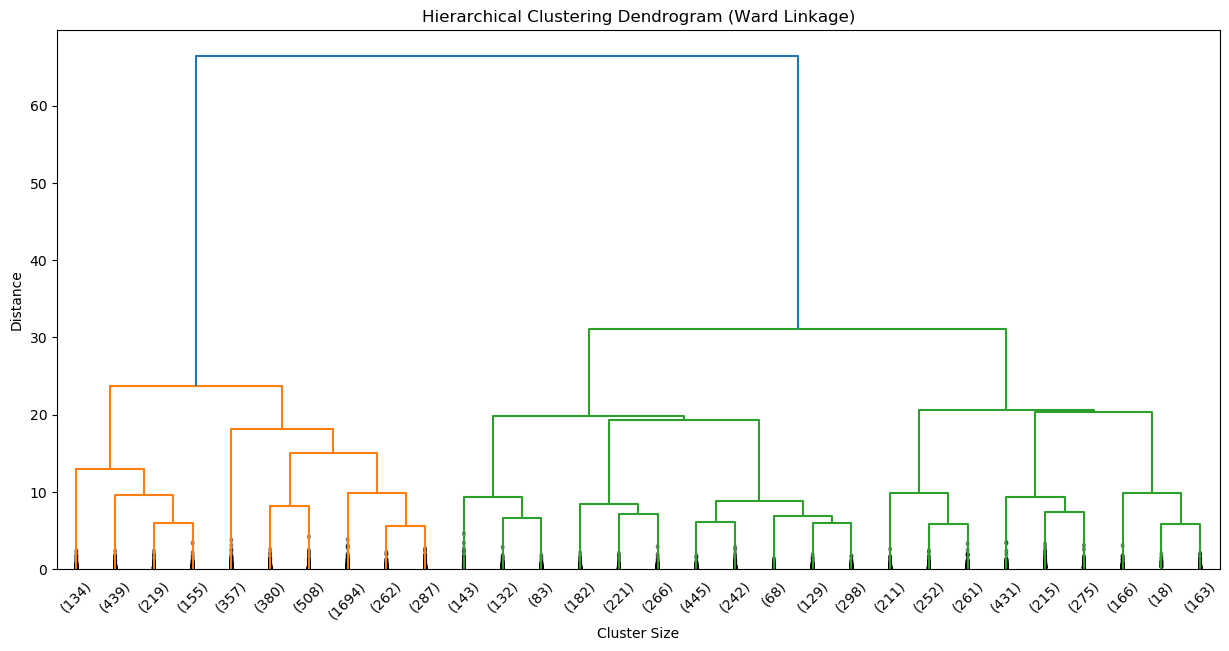

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

distances = linkage(scaled_x, method="centroid", metric="euclidean")

plt.figure(figsize=(15, 7))
scipy_distances = linkage(scaled_x, method='ward', metric='euclidean')
dendrogram(scipy_distances, truncate_mode='lastp', p=30, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

D. Select the best model for this use case and justify your choice in Markdown. If initial models do not produce meaningful clusters, try additional hyperparameter settings and document any iterations and observations. 

3. Conclusions

A. Choose a pair of features and generate a scatter plot of the data, coloring points according to the clusters assigned by your best model. Comment on the plot in Markdown.

B. Generate a histogram showing the number of customers in each cluster and provide observations in Markdown, noting whether cluster sizes make sense.

C. Create a separate DataFrame for each cluster and use pandas.DataFrame.describe to describe each group.

D. Provide a written conclusion summarizing each customer group for the marketing team, based on the summary statistics. Include actionable recommendations derived from the characteristics of each cluster.

E. Analyze whether the chosen model produces meaningful and well-separated clusters. If not, revisit your model run by adjusting hyperparameters and trying again. This process of refining, re-running, and re-evaluating the model is an iterative step. Document all iterations and observations in Markdown.

Note:
Analyze whether the chosen model produces meaningful and well-separated clusters. If not, revisit your model run by adjusting hyperparameters and trying again. This process of refining, re-running, and re-evaluating the model is an iterative step. Document all iterations and observations in Markdown.

Acknowledgment of Group Contributions:
Include a final cell in your notebook titled “Acknowledgment of Contributions.” Clearly list all group members, and have each member indicate whether they are aware of and understand all parts of the work completed, including those they did not personally carry out. Specify the parts of the project each member contributed to, such as data preprocessing, modeling, visualization, or documentation, and highlight any collaborative efforts like reviewing results or interpreting outputs. Be transparent and fair, as grades may be affected if participation was not equitable. Keep the acknowledgment concise while providing enough detail to show each member’s contributions and understanding. 

Reference List:

Bhasin, A. (2017). Credit Card Dataset for Clustering [Dataset]. Kaggle. https://www.kaggle.com/datasets/arjunbhasin2013/ccdata